In [2]:
import os
import json

In [3]:
import json

with open("output_results_train.json", "r") as f:
    li = json.load(f)
with open("output_results_test.json", "r") as f:
    li_2 = json.load(f)

with open("matched_results_train.json", "r") as f:
    li_3 = json.load(f)
with open("matched_results_test.json", "r") as f:
    li_4 = json.load(f)
print(len(li),len(li[0]),len(li[0][0]))
print(len(li_2),len(li_2[0]),len(li_2[0][0]))

print(len(li_3),len(li_3[0]),len(li_3[0][0]))
print(len(li_4),len(li_4[0]),len(li_4[0][0]))

# print(li[0])

4620 14 3
1680 16 3
4620 21 3
1680 22 3


In [4]:
from collections import Counter

# Assuming 'li' and 'li_2' are lists of lists containing tuples (or similar structures)

# Initialize an empty list to collect phonemes
phoneme_list = []
failed_pairs=[]
matched_pairs = []
phonemes_to_skip=["h#","epi","pau","pcl","dcl","tcl","gcl","kcl","bcl"]

# Iterate through 'li' and 'li_2' to extract phonemes from temp[1] and temp[2]
for l in li:
    for temp in l:
        if(temp[1] not in phonemes_to_skip and temp[2] not in phonemes_to_skip):
            failed_pairs.append([temp[1],temp[2]])
            phoneme_list.append(temp[1])
            phoneme_list.append(temp[2])

for l in li_2:
    for temp in l:
        if(temp[1] not in phonemes_to_skip and temp[2] not in phonemes_to_skip):
            failed_pairs.append([temp[1],temp[2]])
            phoneme_list.append(temp[1])
            phoneme_list.append(temp[2])

for l in li_3:
    for temp in l:
        if(temp[1] not in phonemes_to_skip and temp[2] not in phonemes_to_skip):
            matched_pairs.append([temp[1],temp[2]])
            phoneme_list.append(temp[1])
            phoneme_list.append(temp[2])

for l in li_4:
    for temp in l:
        if(temp[1] not in phonemes_to_skip and temp[2] not in phonemes_to_skip):
            matched_pairs.append([temp[1],temp[2]])
            phoneme_list.append(temp[1])
            phoneme_list.append(temp[2])

# Use Counter to count the occurrences of each unique phoneme
phoneme_counter = Counter(phoneme_list)

# Print the number of unique phonemes and the phonemes with their counts
print(len(phoneme_counter), phoneme_counter)

52 Counter({'n': 17086, 'ix': 16708, 's': 16369, 'iy': 14897, 'r': 12592, 'l': 11896, 'k': 11594, 't': 9506, 'm': 9229, 'ih': 9059, 'z': 8764, 'q': 7932, 'd': 7742, 'ax': 7629, 'eh': 7345, 'w': 7104, 'ae': 7097, 'axr': 6938, 'p': 6194, 'dx': 5963, 'ao': 5933, 'f': 5399, 'g': 5177, 'b': 4897, 'v': 4888, 'sh': 4824, 'dh': 4802, 'ay': 4749, 'aa': 4679, 'ey': 4371, 'ah': 4298, 'er': 4128, 'ow': 3736, 'ux': 3724, 'y': 3347, 'ng': 3166, 'jh': 2482, 'nx': 2323, 'hv': 2173, 'ch': 1935, 'th': 1778, 'hh': 1686, 'el': 1619, 'en': 1548, 'oy': 1531, 'aw': 1250, 'uw': 1030, 'uh': 1015, 'ax-h': 573, 'zh': 386, 'em': 239, 'eng': 70})


In [5]:
# Get a sorted list of unique phonemes
sorted_unique_phonemes = sorted(phoneme_counter.keys())

# Print the sorted list of unique phonemes
print(sorted_unique_phonemes)

['aa', 'ae', 'ah', 'ao', 'aw', 'ax', 'ax-h', 'axr', 'ay', 'b', 'ch', 'd', 'dh', 'dx', 'eh', 'el', 'em', 'en', 'eng', 'er', 'ey', 'f', 'g', 'hh', 'hv', 'ih', 'ix', 'iy', 'jh', 'k', 'l', 'm', 'n', 'ng', 'nx', 'ow', 'oy', 'p', 'q', 'r', 's', 'sh', 't', 'th', 'uh', 'uw', 'ux', 'v', 'w', 'y', 'z', 'zh']


In [4]:
import csv

# Function to read the CSV and create the phoneme classification dictionary
# Function to read the CSV and create the phoneme classification dictionary
def create_phoneme_classification(csv_file):
    phoneme_classification = {}

    # Open the CSV file and read its contents
    with open(csv_file, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)

        # Loop through each row in the CSV
        for row in reader:
            phoneme = row['Phoneme']
            manner = row['Manner of Articulation']
            place = row['Place of Articulation']
            voicing = row['Voicing']

            # Combine manners based on the provided rules
            if manner in ["Glottal Stop", "Flap", "Stop"]:
                manner = "Stop"
            elif manner in ["Liquid", "Lateral Liquid","Glide"]:
                manner = "Approximants"
            elif manner in ["Vowel (R-colored)", "Diphthong"]:
                manner = "Diphthong"

            # Create dictionary entry for each phoneme
            phoneme_classification[phoneme] = {
                'Manner': manner,
                'Place': place,
                'Voicing': voicing
            }

    return phoneme_classification


# Example usage
csv_file = 'phoneme_data.csv'  # Replace with the path to your CSV file
phoneme_classification = create_phoneme_classification(csv_file)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


# Create a DataFrame from the failure pairs
def classify_phoneme(phoneme):
    return phoneme_classification.get(phoneme, {'Manner': 'Unknown', 'Place': 'Unknown', 'Voicing': 'Unknown'})

data = []
for pair in failed_pairs:
    phoneme1, phoneme2 = pair
    classification1 = classify_phoneme(phoneme1)
    classification2 = classify_phoneme(phoneme2)
    data.append({
        'Phoneme 1': phoneme1, 'Phoneme 2': phoneme2,
        'Manner 1': classification1['Manner'], 'Place 1': classification1['Place'], 'Voicing 1': classification1['Voicing'],
        'Manner 2': classification2['Manner'], 'Place 2': classification2['Place'], 'Voicing 2': classification2['Voicing']
    })

df_failed = pd.DataFrame(data)
df_failed.head(5)

,Phoneme 1,Phoneme 2,Manner 1,Place 1,Voicing 1,Manner 2,Place 2,Voicing 2
0,sh,hv,Fricative,Palato-Alveolar,Voiceless,Fricative,Glottal,Voiceless
1,s,w,Fricative,Alveolar,Voiceless,Approximants,Bilabial,Voiced
2,ix,ao,Vowel,High central,Voiced,Vowel,Mid back,Voiced
3,sh,w,Fricative,Palato-Alveolar,Voiceless,Approximants,Bilabial,Voiced
4,w,dx,Approximants,Bilabial,Voiced,Stop,Alveolar,Voiced


In [6]:
data = []
for pair in matched_pairs:
    phoneme1, phoneme2 = pair
    classification1 = classify_phoneme(phoneme1)
    classification2 = classify_phoneme(phoneme2)
    data.append({
        'Phoneme 1': phoneme1, 'Phoneme 2': phoneme2,
        'Manner 1': classification1['Manner'], 'Place 1': classification1['Place'], 'Voicing 1': classification1['Voicing'],
        'Manner 2': classification2['Manner'], 'Place 2': classification2['Place'], 'Voicing 2': classification2['Voicing']
    })

df_matched = pd.DataFrame(data)
df_matched.head(5)

,Phoneme 1,Phoneme 2,Manner 1,Place 1,Voicing 1,Manner 2,Place 2,Voicing 2
0,ix,eh,Vowel,High central,Voiced,Vowel,Mid front,Voiced
1,eh,jh,Vowel,Mid front,Voiced,Affricate,Palato-Alveolar,Voiced
2,ih,d,Vowel,High front,Voiced,Stop,Alveolar,Voiced
3,ah,k,Vowel,Low central,Voiced,Stop,Velar,Voiceless
4,k,ux,Stop,Velar,Voiceless,Vowel,High back,Voiced


In [7]:
# Same manner, place, or voicing
df_failed['Same Manner'] = df_failed['Manner 1'] == df_failed['Manner 2']
df_failed['Same Place'] = df_failed['Place 1'] == df_failed['Place 2']
df_failed['Same Voicing'] = df_failed['Voicing 1'] == df_failed['Voicing 2']

# Same manner, place, or voicing
df_matched['Same Manner'] = df_matched['Manner 1'] == df_matched['Manner 2']
df_matched['Same Place'] = df_matched['Place 1'] == df_matched['Place 2']
df_matched['Same Voicing'] = df_matched['Voicing 1'] == df_matched['Voicing 2']

# Group by shared characteristics
same_manner_count = df_failed['Same Manner'].sum()/(df_matched['Same Manner'].sum()+df_failed['Same Manner'].sum())
same_place_count = df_failed['Same Place'].sum()/(df_matched['Same Place'].sum()+df_failed['Same Place'].sum())
same_voicing_count = df_failed['Same Voicing'].sum()/(df_matched['Same Voicing'].sum()+df_failed['Same Voicing'].sum())

print(f"Failures with same manner: {same_manner_count}")
print(f"Failures with same place: {same_place_count}")
print(f"Failures with same voicing: {same_voicing_count}")


Failures with same manner: 0.3006954811928777
Failures with same place: 0.26996115666810533
Failures with same voicing: 0.3061369969541831


In [ ]:
unique_manners = ['Stop',
 'Affricate',
 'Fricative',
 'Nasal',
 'Approximants',
 'Diphthong',
 'Vowel']

In [10]:
# Create manner co-occurrence matrices for failures and matches
manner_pairs_failed = [(row['Manner 1'], row['Manner 2']) for _, row in df_failed.iterrows()]
manner_pairs_matched = [(row['Manner 1'], row['Manner 2']) for _, row in df_matched.iterrows()]

manner_counts_failed = Counter(tuple(sorted(pair)) for pair in manner_pairs_failed)
manner_counts_matched = Counter(tuple(sorted(pair)) for pair in manner_pairs_matched)

# Initialize percentage matrix
manner_matrix_percentage = pd.DataFrame(0.0, index=unique_manners, columns=unique_manners)
manner_matrix_count = pd.DataFrame(0.0, index=unique_manners, columns=unique_manners)

# Compute failure percentages
for (manner1, manner2) in set(manner_counts_failed.keys()).union(manner_counts_matched.keys()):
    failure_count = manner_counts_failed.get(tuple(sorted((manner1, manner2))), 0)
    match_count = manner_counts_matched.get(tuple(sorted((manner1, manner2))), 0)
    total_count = failure_count + match_count
    manner_matrix_count.loc[manner1, manner2] = failure_count
    manner_matrix_count.loc[manner2, manner1] = failure_count
    # Avoid division by zero
    if total_count > 0:
        percentage_failure = (failure_count / total_count) * 100
        manner_matrix_percentage.loc[manner1, manner2] = percentage_failure
        manner_matrix_percentage.loc[manner2, manner1] = percentage_failure  # Symmetric matrix


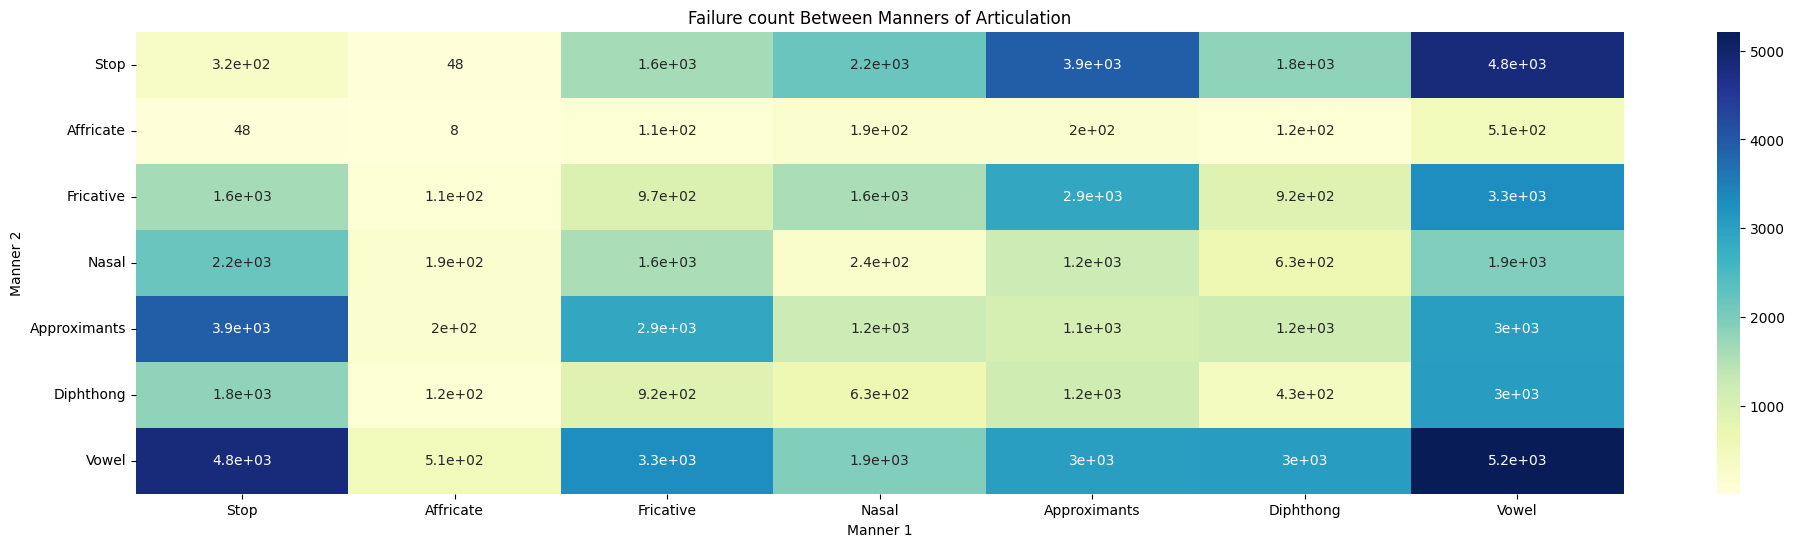

In [11]:
plt.figure(figsize=(24, 6))
sns.heatmap(manner_matrix_count, annot=True, cmap="YlGnBu")
plt.title("Failure count Between Manners of Articulation")
plt.xlabel("Manner 1")
plt.ylabel("Manner 2")
plt.show()

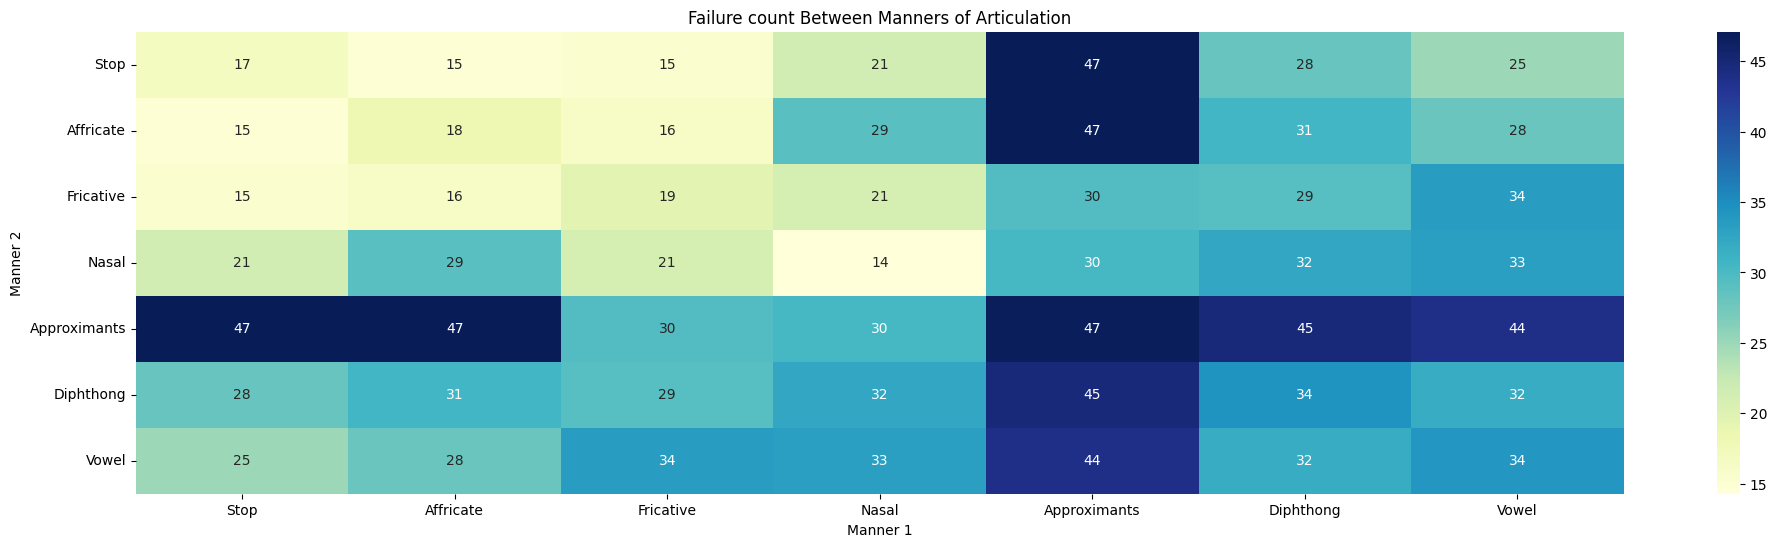

In [ ]:
plt.figure(figsize=(24, 6))
sns.heatmap(manner_matrix_percentage, annot=True, cmap="YlGnBu")
plt.title("Failure percentage Between Manners of Articulation")
plt.xlabel("Manner 1")
plt.ylabel("Manner 2")
plt.show()

In [ ]:
from collections import Counter

# Function to get top 5 phoneme pairs for each manner
def get_top_pairs_by_manner(unique_manners, phoneme_classification):
    # Initialize dictionary to store top pairs
    top_failed_pairs = {}
    top_matched_pairs = {}

    # Iterate over each manner
    for manner in unique_manners:
        # Filter pairs where both phonemes belong to the same manner
        pairs_failed = [
            tuple(sorted((row['Phoneme 1'], row['Phoneme 2'])))
            for _, row in df_failed.iterrows()
            if phoneme_classification[row['Phoneme 1']]['Manner'] == manner and 
               phoneme_classification[row['Phoneme 2']]['Manner'] == manner
        ]

        pairs_matched = [
            tuple(sorted((row['Phoneme 1'], row['Phoneme 2'])))
            for _, row in df_matched.iterrows()
            if phoneme_classification[row['Phoneme 1']]['Manner'] == manner and 
               phoneme_classification[row['Phoneme 2']]['Manner'] == manner
        ]

        # Count occurrences
        failed_counts = Counter(pairs_failed)
        matched_counts = Counter(pairs_matched)

        # Get top 5 pairs
        top_failed_pairs[manner] = failed_counts.most_common(5)
        top_matched_pairs[manner] = matched_counts.most_common(5)

    return top_failed_pairs

# Call the function
top_failed_pairs, top_matched_pairs = get_top_pairs_by_manner(unique_manners, phoneme_classification)

# Display results
for manner in unique_manners:
    print(f"\nManner: {manner}")
    print("Top 5 Failed Pairs:")
    for pair, count in top_failed_pairs[manner]:
        print(f"{pair}: {count}")



Manner: Stop
Top 5 Failed Pairs:
('dx', 'q'): 107
('q', 't'): 31
('b', 'q'): 24
('d', 'q'): 20
('b', 'dx'): 19
Top 5 Matched Pairs:
('dx', 'q'): 488
('b', 'dx'): 133
('dx', 't'): 100
('dx', 'p'): 98
('q', 't'): 97

Manner: Affricate
Top 5 Failed Pairs:
('ch', 'ch'): 6
('jh', 'jh'): 1
('ch', 'jh'): 1
Top 5 Matched Pairs:
('ch', 'jh'): 20
('ch', 'ch'): 9
('jh', 'jh'): 7

Manner: Fricative
Top 5 Failed Pairs:
('hv', 'sh'): 310
('dh', 's'): 91
('s', 's'): 58
('s', 'z'): 55
('s', 'v'): 51
Top 5 Matched Pairs:
('dh', 's'): 471
('s', 'z'): 335
('s', 'v'): 317
('hv', 'sh'): 273
('s', 's'): 256

Manner: Nasal
Top 5 Failed Pairs:
('m', 'n'): 84
('m', 'nx'): 38
('n', 'ng'): 20
('n', 'nx'): 20
('m', 'm'): 19
Top 5 Matched Pairs:
('m', 'n'): 688
('n', 'n'): 211
('m', 'nx'): 145
('n', 'ng'): 124
('m', 'm'): 80

Manner: Approximants
Top 5 Failed Pairs:
('l', 'r'): 351
('l', 'w'): 235
('r', 'w'): 145
('l', 'y'): 91
('r', 'y'): 86
Top 5 Matched Pairs:
('l', 'r'): 669
('l', 'w'): 152
('r', 'w'): 90
('l

In [13]:
import os

def print_tree(path, indent=""):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, "").count(os.sep)
        print(f"{indent}{' ' * 4 * level}{os.path.basename(root)}")
        subindent = " " * 4 * (level + 1)
        for file in files[:2]:
            print(f"{subindent}{file}")

# Usage
print_tree('C:\\Users\\sriha\\OneDrive - International Institute of Information Technology\\Sem7\\SAL\\Project Proposal\\timit_directory')


timit_directory
    test
        DR1_FAKS0_SA1.phn
        DR1_FAKS0_SA1.wav
    train
        DR1_FCJF0_SA1.phn
        DR1_FCJF0_SA1.wav
